# Challenge 1
## Below are some code to help you get started with manipulating the data and plot the time series. You may use them to manually identify thief hatch open and close events.

In [30]:
# get tank header pressure

import pandas as pd
from datetime import timedelta 
from glob import glob 

from glob import glob 
import pandas as pd

df_thp = []
for f in glob('data/tank_header_pressure_*.csv'):
    df_thp.append(pd.read_csv(f))

df_thp = pd.concat(df_thp)
df_thp.info()
df_thp.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246256 entries, 0 to 246255
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     object 
 1   TagType       object 
 2   FACILITY_ID   int64  
 3   pressure_osi  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.7+ MB


,timestamp,TagType,FACILITY_ID,pressure_osi
0,2023-01-13 06:17:26.258,FlareTankHeaderPressureCurr,10086103,-88.000000
1,2023-02-05 15:17:29.831,FlareTankHeaderPressureCurr,10086103,2.550003
2,2023-02-05 15:32:24.920,FlareTankHeaderPressureCurr,10086103,5.390007
3,2023-02-05 15:47:25.766,FlareTankHeaderPressureCurr,10086103,9.250000
4,2023-02-05 16:02:25.933,FlareTankHeaderPressureCurr,10086103,12.740010


In [31]:
# check thp for one facility that we magically knew it had open thief hatch

facility_id = 10085460 
df_thp_460 = df_thp[df_thp.FACILITY_ID == facility_id].copy()
df_thp_460.timestamp = pd.to_datetime(df_thp_460.timestamp)
print(df_thp_460.head())

from utils import plot_ts_open_hatch
fig = plot_ts_open_hatch(dfi=df_thp_460, fac_id=facility_id)
fig.show()

                     timestamp                      TagType  FACILITY_ID  \
433365 2022-01-11 22:33:48.115  FlareTankHeaderPressureCurr     10085460   
433366 2022-01-11 22:44:36.805  FlareTankHeaderPressureCurr     10085460   
433367 2022-01-11 22:59:36.962  FlareTankHeaderPressureCurr     10085460   
433368 2022-01-11 23:29:36.470  FlareTankHeaderPressureCurr     10085460   
433369 2022-01-11 23:44:35.978  FlareTankHeaderPressureCurr     10085460   

        pressure_osi  
433365      1.489998  
433366      1.570000  
433367      1.720001  
433368      1.760002  
433369      1.900002  


From the above it appears that there could be a few different places where the hatch opened. Sometime around April 25th is as possibility, however due to the quick spike in psi at the end of June (around June 24th) I would say that that is not the best indicator of when the hatch opened. I would say that the hatch opened around July 15th as the psi levels steady off after that until the hatch is closed again (appears to be around August 25th).

In [32]:
# # get drone data

df_drone = pd.read_csv('data/drone.csv')
print(df_drone.info())

print('Total facilities detected open hatch:', len(df_drone.FACILITY_ID.unique())) 
print('Total open hatch event detected:', len(df_drone.DTM.unique())) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ASSET        1237 non-null   object
 1   DTM          1238 non-null   object
 2   FACILITY_ID  1238 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.1+ KB
None
Total facilities detected open hatch: 368
Total open hatch event detected: 1238


In [33]:
# get drone data for facility 10085460
df_drone_460 = df_drone[df_drone.FACILITY_ID == facility_id]
df_drone_460 

,ASSET,DTM,FACILITY_ID
27,Permian,2022-08-19 13:49:00.000,10085460


In [52]:
# check tank header pressure only limited days before and after to keep plot clean and easy to read
from datetime import timedelta

t_drone_open_hatch = df_drone_460.DTM.iloc[0] # in this case, only one open hatch event detected for this facility
t_drone_open_hatch = pd.to_datetime(t_drone_open_hatch)

t_strt = t_drone_open_hatch - timedelta(days=60)
t_stop = t_drone_open_hatch + timedelta(days=30)

df_thp_460 = df_thp_460[df_thp_460.timestamp.between(t_strt, t_stop)]
df_thp_460


<class 'str'>


,timestamp,TagType,FACILITY_ID,pressure_osi
573580,2022-06-20 13:59:33.763,FlareTankHeaderPressureCurr,10085460,0.940002
573581,2022-06-20 14:14:33.768,FlareTankHeaderPressureCurr,10085460,1.000000
573582,2022-06-20 14:29:34.027,FlareTankHeaderPressureCurr,10085460,1.050003
573583,2022-06-20 14:44:34.323,FlareTankHeaderPressureCurr,10085460,1.150002
573584,2022-06-20 14:59:34.437,FlareTankHeaderPressureCurr,10085460,1.160004
...,...,...,...,...
646679,2022-09-18 12:29:34.280,FlareTankHeaderPressureCurr,10085460,0.750000
646680,2022-09-18 12:44:34.341,FlareTankHeaderPressureCurr,10085460,0.739998
646681,2022-09-18 12:59:34.630,FlareTankHeaderPressureCurr,10085460,0.800003
646682,2022-09-18 13:14:34.200,FlareTankHeaderPressureCurr,10085460,0.910004


In [35]:
# get work order data to check whether and when hatch was closed

df_workorder = pd.read_csv('data/work_order.csv')
df_workorder.facility_id = df_workorder.facility_id.fillna(0).astype(int)
df_workorder

,created_date,assetType,sourceSystemId,facility_id,corp_id,workOrderDescription,workOrderResolutionDescription,workOrderActualsStartDate,workOrderActualsEndDate
0,2021-10-06,Facility,10085735,10085735,NaN,Facility battery charger for methanol pump 3,: Methanol pump #3 not working. We found the ...,2021-10-06,2021-10-08
1,2022-08-03,Well,14412265-000,0,14412265-000,CATC PM; Due 2022-09-03; PM Desc: X-Ray Inspec...,"Project| PMSAP,Project SAPWO|41056777,SAPWO DU...",NaN,2022-09-03
2,2021-12-04,Facility,10085735,10085735,NaN,"Leak on oil load line, needs tightened, flagge...","inspected piping and repaired leak, did not ha...",NaN,2021-12-06
3,2022-03-04,Facility,10085526,10085526,NaN,OOOOA inspection,"Wellhead 4” casing, tubing tie in line at lowe...",NaN,2022-03-04
4,2022-09-06,Well,20177047,0,20177047-000,CATC PM; Due 2022-10-30;TAYLOR 26-23 #2-ALT;Fu...,"Project| PMSAP,Project SAPWO|41055453,SAPWO DU...",2022-10-26,2022-10-26
...,...,...,...,...,...,...,...,...,...
193846,2021-09-10,Facility,10085456,10085456,NaN,Versa solenoid for HP flare ko is not working.,"""Went to troubleshoot solenoid on flare KO. Fo...",2021-09-10,2021-09-13
193847,2021-09-16,Facility,10085914,10085914,NaN,WMT for Baker to check and replace fuses in ES...,fuses replaced,NaN,2021-10-11
193848,2019-11-06,Facility,10085767,10085767,NaN,site up - compressor down,Compressor down with no code . Restarted . Ope...,2019-11-06,2019-11-06
193849,2022-02-05,Facility,10085462,10085462,NaN,Site flaring,"Flaring due to 1H HP sep oil dump hung open, b...",NaN,2022-02-04


In [36]:
# get work order data for facility 10085460 

# filter rows containing key word 'hatch', keyword could be 'thief' or misspelled words
df_workorder_460 = df_workorder[df_workorder.facility_id == facility_id]
df_workorder_460 = df_workorder_460[(df_workorder_460.workOrderDescription.fillna('').str.lower().str.contains('hatch'))
                | ((df_workorder_460.workOrderResolutionDescription.fillna('').str.lower().str.contains('hatch')))
]

# filter rows with dates within drone detected open hatch date
df_workorder_460.created_date = pd.to_datetime(df_workorder_460.created_date)
df_workorder_460.workOrderActualsStartDate = pd.to_datetime(df_workorder_460.workOrderActualsStartDate)
df_workorder_460.workOrderActualsEndDate = pd.to_datetime(df_workorder_460.workOrderActualsEndDate)

t_workorder_strt = t_drone_open_hatch - timedelta(days=30)
t_workorder_stop = t_drone_open_hatch + timedelta(days=30)

df_workorder_460 = df_workorder_460[
    df_workorder_460.created_date.between(t_workorder_strt, t_workorder_stop)
    | df_workorder_460.workOrderActualsStartDate.between(t_workorder_strt, t_workorder_stop)
    | df_workorder_460.workOrderActualsEndDate.between(t_workorder_strt, t_workorder_stop)
]
df_workorder_460

fig = plot_ts_open_hatch(dfi=df_thp_460, fac_id=facility_id, t_drone_open_hatch=t_drone_open_hatch)
fig.show()

,created_date,assetType,sourceSystemId,facility_id,corp_id,workOrderDescription,workOrderResolutionDescription,workOrderActualsStartDate,workOrderActualsEndDate
192845,2022-08-24,Facility,10085460,10085460,NaN,Got a drone finding indicating there’s an open...,Thief hatch has been closed.,NaT,2022-08-25


In [37]:
# get forms data

df_form = pd.read_csv('data/forms.csv').sort_values(by='SubmitDate')
df_form

,SubmitDate,VisibleFlare,ThiefHatchClosed,OpenThiefHatchClosed,IssueDetail,BusinessUnit,FACILITY_ID
431,1/20/2023 16:05:13,"No, one or more flares are not lit.",NaN,NaN,State Hope Springs 113-23X14 is Shut in as wel...,Permian,10090756.0
629,1/20/2023 16:41:44,"No, one or more flares are not lit.",NaN,NaN,The flare coming off the LP separator is not l...,Permian,10085558.0
655,1/20/2023 17:08:41,"No, one or more flares are not lit.",NaN,NaN,"Well is shut-in, facility under construction",Permian,10085767.0
416,1/20/2023 17:11:26,"No, one or more flares are not lit.",NaN,NaN,"Well is shut-in, facility is under construction",Permian,10085680.0
617,1/20/2023 17:23:32,"No, one or more flares are not lit.",NaN,NaN,Wells are shut in,Permian,10213848.0
...,...,...,...,...,...,...,...
214,3/2/2023 14:00:39,"No, one or more flares are not lit.",NaN,NaN,HSS 113-10 B flare not lit well shut in.,Permian,10085815.0
96,3/2/2023 14:55:54,"No, one or more flares are not lit.",NaN,NaN,Flare not lit due to well shut in,Permian,10085548.0
40,3/2/2023 15:28:17,"No, one or more flares are not lit.",NaN,NaN,"Wells shut in, flare not active",Permian,20000064.0
162,3/2/2023 15:49:37,"No, one or more flares are not lit.",NaN,NaN,Well is shut in,Permian,10085552.0


In [55]:
# plot pressure with drone detected open hatch time, you may add hatch open or close time from work order or Forms data or other notes to the plot.
import requests
import plotly.io as pio
from pandas import Timestamp
print(t_drone_open_hatch)
t_open_manual = pd.to_datetime('2022-07-16 12:44')
fig = plot_ts_open_hatch(dfi=df_thp_460, fac_id=facility_id, t_drone_open_hatch=t_drone_open_hatch)
fig.show()

2022-08-19 13:49:00


It would appear in the above graph that the drone detected the hatch to be open on August 19th. From observing the data it would appear that the hatch was most likely actually opened around July 16th. 

In [42]:
open_hatch_events_manual = {'Facility ID': [facility_id],
                            'Time When Hatch Opened (Identified Manually)': ['July 16'],
                            'Time When Hatch Closed (Identified Manually)': ['August 25'],
                            'Time When Hatch Opened (Drone Data)': ['August 19'], 
                            'Time When Hatch Closed (Drone Data)': ['August 25'],
                            'Time When Hatch Opened (Work Orders Data)': [1],
                            'Time When Hatch Closed (Work Orders Data)': [1],
                            'Time When Hatch Opened (Forms Data)': [1],
                            'Time When Hatch Closed (Forms Data)': [1]}

open_hatch_events_manual = pd.DataFrame(open_hatch_events_manual)

#open_hatch_events_manual = pd.DataFrame([]) 
#open_hatch_events_manual['Facility ID'] = facility_id

# it should include 9 columns of 
# facility_id, 
# time when hatch opened(identified manually), time when hatch closed(identified manually)
# time when hatch was opened(from drone data), time when hatch was close(from drone data), 
# time when hatch opened(from work orders data), time when hatch opened(from work order data)
# time when hatch opened(from forms data), time when hatch opened(from forms data)

open_hatch_events_manual.to_csv('results/challenge_1/open_hatch_events_manual.csv')
open_hatch_events_manual.head()

,Facility ID,Time When Hatch Opened (Identified Manually),Time When Hatch Closed (Identified Manually),Time When Hatch Opened (Drone Data),Time When Hatch Closed (Drone Data),Time When Hatch Opened (Work Orders Data),Time When Hatch Closed (Work Orders Data),Time When Hatch Opened (Forms Data),Time When Hatch Closed (Forms Data)
0,10085460,July 16,August 25,1,1,1,1,1,1


# Challenge 2
## Develop algorithm to classify time series data to determine whether thief hatch is open or not at any given time

In [13]:
from models import model_random, model_ground_truth
from datetime import datetime

df = df_thp_460.copy() # use df for easy reference
pred_freq = timedelta(hours=4) # Predict every 4 hours

t_strt = df.timestamp.iloc[0]
t_strt = datetime(*t_strt.timetuple()[:4]) # round datetime to nearest hours
t_strt += pred_freq 
t_strt_0 = t_strt

t_stop = df.timestamp.iloc[-1]
t_stop = datetime(*t_stop.timetuple()[:4]) # round datetime to nearest hours
t_stop -= pred_freq 

df_pred = []
while t_strt <= t_stop:

    # model_ground_truth is bpx manually labelled, you may need to label groud truth for the events you identified
    # model_random is a random model to predict whether hatch is open or not. 
    # You should replace it with your own model
    # you model may need to deal with missing data
    
    df_pred.append([t_strt, model_ground_truth(df, t_strt)] + model_random(df, t_strt))

    t_strt += pred_freq

df_pred = pd.DataFrame(df_pred, columns = ['TimeStamp', 'Status_Truth', 'Status_Predicted', 'Probability_Open_Hatch'])    
df_pred


,TimeStamp,Status_Truth,Status_Predicted,Probability_Open_Hatch
0,2022-06-20 17:00:00,0,1,0.998740
1,2022-06-20 21:00:00,0,0,0.910774
2,2022-06-21 01:00:00,0,1,0.852552
3,2022-06-21 05:00:00,0,1,0.088533
4,2022-06-21 09:00:00,0,0,0.231494
...,...,...,...,...
534,2022-09-17 17:00:00,0,0,0.503650
535,2022-09-17 21:00:00,0,0,0.353420
536,2022-09-18 01:00:00,0,0,0.861712
537,2022-09-18 05:00:00,0,0,0.030367


In [14]:
from utils import plot_prediction_validation

fig = plot_prediction_validation(df, df_pred, facility_id)
fig.write_image(f'results/challenge_2/prediction_validation_{facility_id}.png')
fig.show()

## Now classify other time series you identified in Challenge 1. 
### The time series you classify should start roughly at 30 days before the hacth opened and till 30 days after hatch closed, which you identified manually. 


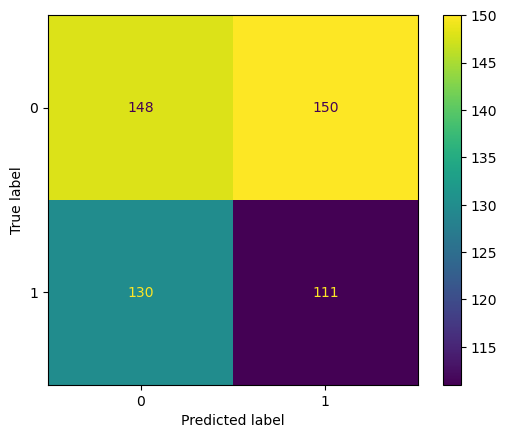

In [15]:

# calculate classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, accuracy_score
conf_matrix = confusion_matrix(df_pred.Status_Truth, df_pred.Status_Predicted)
ConfusionMatrixDisplay(conf_matrix).plot()

In [16]:
# store scores for each "facility_id, df.timestamp.min(), df.timestamp.max()"

scores = [facility_id, t_strt_0, t_stop, pred_freq, df_pred.shape[0], 
          accuracy_score(df_pred.Status_Truth, df_pred.Status_Predicted),
          recall_score(df_pred.Status_Truth, df_pred.Status_Predicted),
          precision_score(df_pred.Status_Truth, df_pred.Status_Predicted),
          f1_score(df_pred.Status_Truth, df_pred.Status_Predicted)
          ]

scores = pd.DataFrame([scores], columns = ['facility_id', 't_strt', 't_stop', 'pred_freq', 'pred_#', 'accuracy_score', 'recall_score', 'precision_score', 'f1_score'])

scores.to_csv('results/challenge_2/model_predictions.csv', index=False)

scores

,facility_id,t_strt,t_stop,pred_freq,pred_#,accuracy_score,recall_score,precision_score,f1_score
0,10085460,2022-06-20 17:00:00,2022-09-18 09:00:00,0 days 04:00:00,539,0.480519,0.460581,0.425287,0.442231


# Challenge 3
## Use the algorithm you developed or new algorithm to identify retrospectively open thief hatches in the past that’s not detected by drone

In [17]:
from models import search_for_open_hatch_random

search_res = []

for fac_id in df_thp.FACILITY_ID.unique():

    df = df_thp[df_thp.FACILITY_ID == fac_id]

    # replace "search_for_open_hatch_random", which is a random model, with your own model
    events = search_for_open_hatch_random(df, fac_id)
    
    search_res +=events

search_res = pd.DataFrame(search_res, columns = ['facility_id', 'num_of_open_hatch_events', 'open_hatch_event_seq', 't_hacth_open', 't_hacth_clos', 'prob_has_open_hatch_event'])

search_res.to_csv('results/challenge_3/search_results.csv', index=False)

search_res

,facility_id,num_of_open_hatch_events,open_hatch_event_seq,t_hacth_open,t_hacth_clos,prob_has_open_hatch_event
0,10086103,1,1,2023-02-07 22:47:34.747,2023-02-21 12:02:28.009,0.280723
1,10085682,1,1,2023-01-16 06:19:14.506,2023-02-17 09:04:16.702,0.225621
2,10085526,2,1,2023-01-10 13:51:22.033,2023-01-25 15:21:21.545,0.977550
3,10085526,2,2,2023-01-09 03:36:33.440,2023-02-04 11:21:21.851,0.888056
4,10085845,2,1,2022-09-22 15:47:25.465,2022-12-24 00:47:24.912,0.178501
...,...,...,...,...,...,...
155,10085488,1,1,2023-01-22 17:20:35.032,2023-02-13 01:07:00.000,0.193489
156,20000089,2,1,2023-01-29 10:33:13.343,2023-02-11 14:18:15.800,0.252538
157,20000089,2,2,2023-01-27 02:18:28.590,2023-02-16 09:33:12.615,0.561340
158,10090752,2,1,2023-01-28 09:57:30.379,2023-01-30 12:57:26.537,0.275773


In [18]:

search_res_plot = search_res.iloc[:10] # limit what and how many to plot

for _, fac_id, num_of_open_hatch_events, open_hatch_event_seq, t_hacth_open, t_hacth_clos, prob_open_hatch_event in search_res_plot.itertuples():
    
    dfi = df_thp[df_thp.FACILITY_ID==fac_id].copy()

    # ensure in datetime format
    t_hacth_open = pd.to_datetime(t_hacth_open)
    t_hacth_clos = pd.to_datetime(t_hacth_clos)

    t_strt = t_hacth_open - timedelta(days=30)
    t_stop = t_hacth_clos + timedelta(days=30)
    
    dfi.timestamp = pd.to_datetime(dfi.timestamp)
    dfi = dfi[dfi.timestamp.between(t_strt, t_stop)] # limit the dataframe 

    fig = plot_ts_open_hatch(dfi=dfi, fac_id=facility_id)
    fig.update_layout(title=f'{fac_id}-[{open_hatch_event_seq:01}-{num_of_open_hatch_events:01}], hatch open: {t_hacth_open}, hatch close: {t_hacth_clos}')
    fig.write_image(f'results/challenge_3/imgs_search_results/{fac_id}-[{open_hatch_event_seq:01}-{num_of_open_hatch_events:01}].png', engine='orca')

In [19]:
print('Good luck!')

Good luck!
